In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from ipynb.fs.full.add_committees import committees, get_committee, get_party, legend_text

In [2]:
df = pd.read_csv('SenatorCleaned_v2.csv')

In [3]:
sector_counts = df[df['Sector'] != 'Unknown'].groupby(['Name', 'Sector']).size().unstack(fill_value=0)

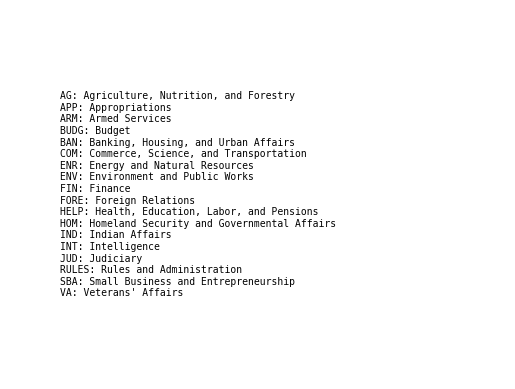

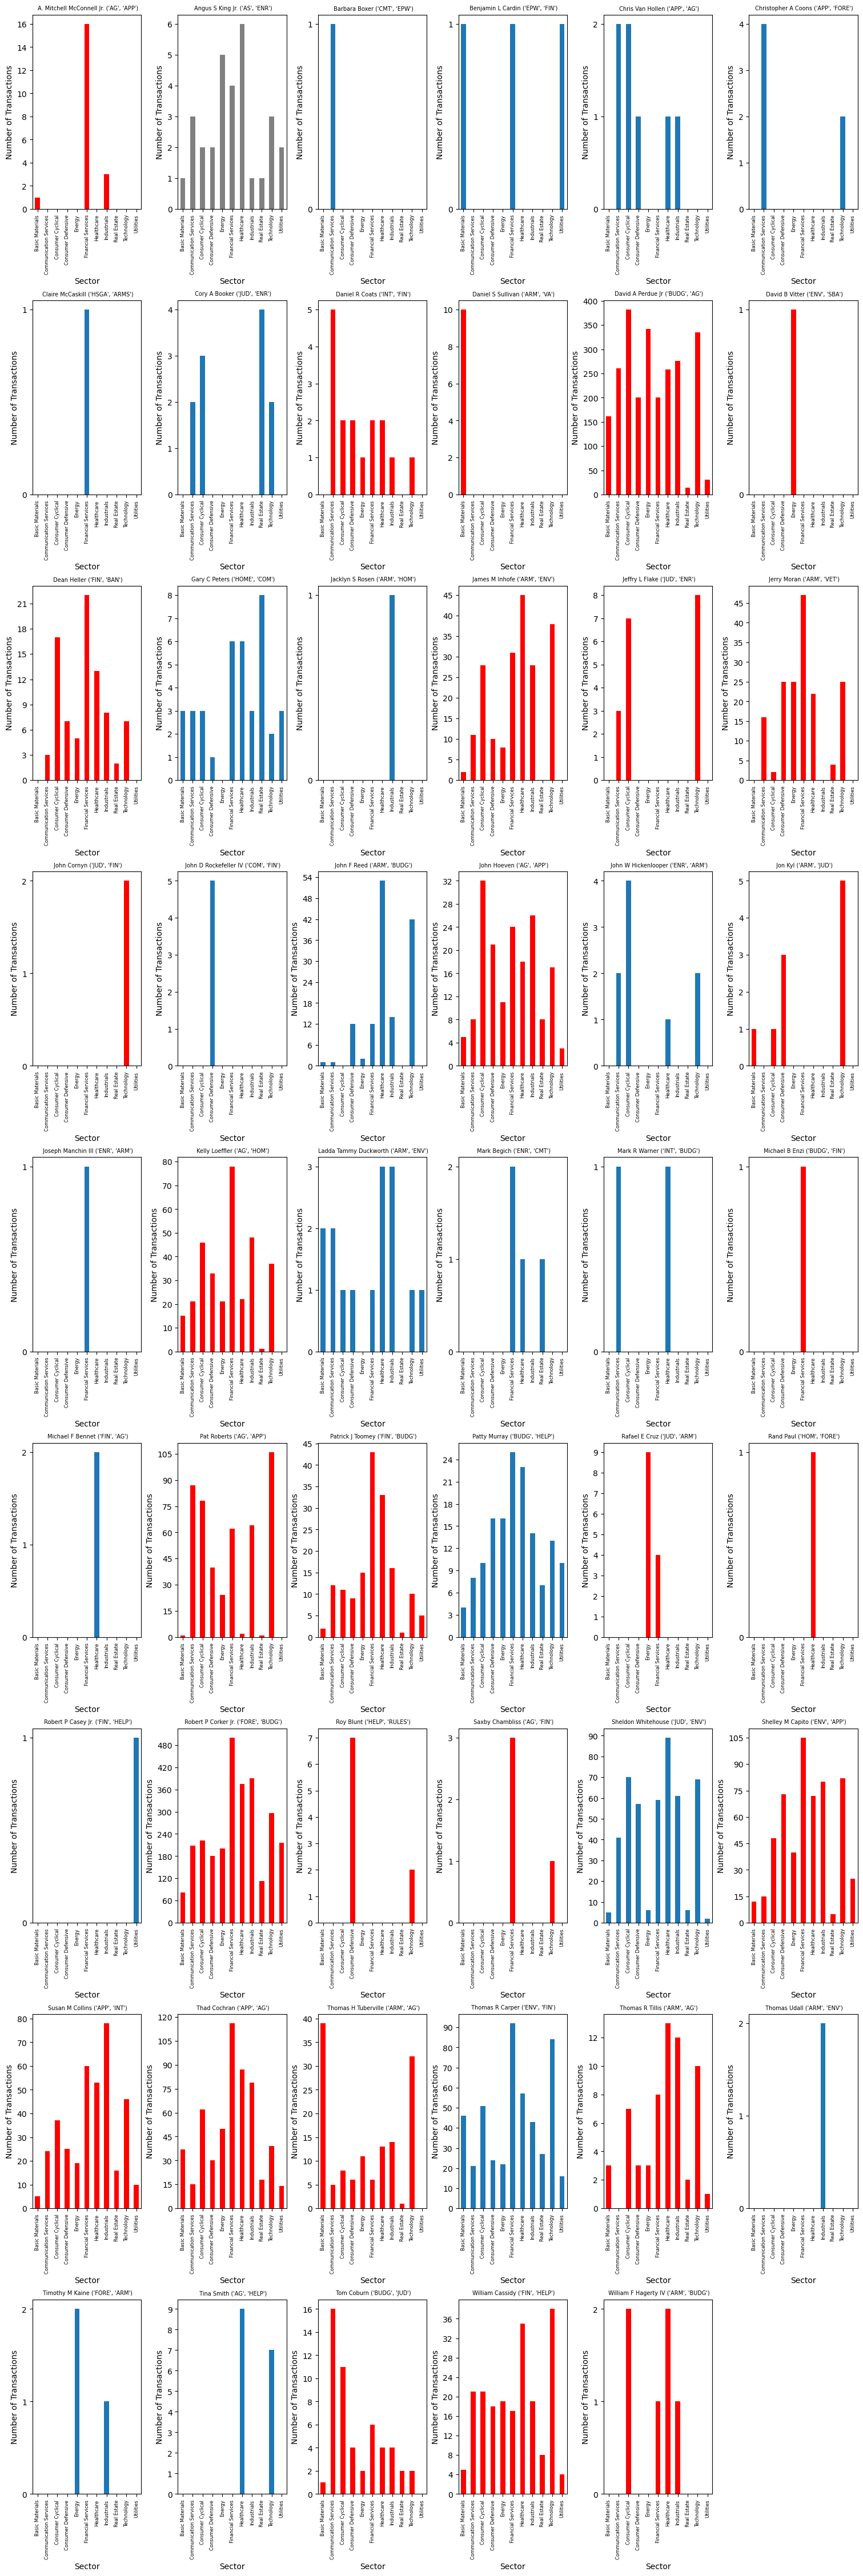

In [4]:
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Add the legend text
ax.text(0.1, 0.5, legend_text, va='center', ha='left', fontsize=7, family='monospace')

plt.show()

num_senators = sector_counts.shape[0]
num_cols = 6  # Number of columns in the subplot grid
num_rows = (num_senators + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

# Plot each senator's data in a subplot
for i, (senator, senator_data) in enumerate(sector_counts.iterrows()):
    
    if get_party(senator) == 'Republican':
        senator_data.plot(kind='bar', ax=axes[i], color = 'red')
    elif get_party(senator) == 'Independent':
        senator_data.plot(kind='bar', ax=axes[i], color = 'grey')
    else:
        senator_data.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{senator} {get_committee(senator)}', fontsize=7)
    axes[i].set_xlabel('Sector')
    axes[i].set_ylabel('Number of Transactions')
    axes[i].tick_params(axis='x', labelsize=6, rotation=90)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure y-axis ticks are integers

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

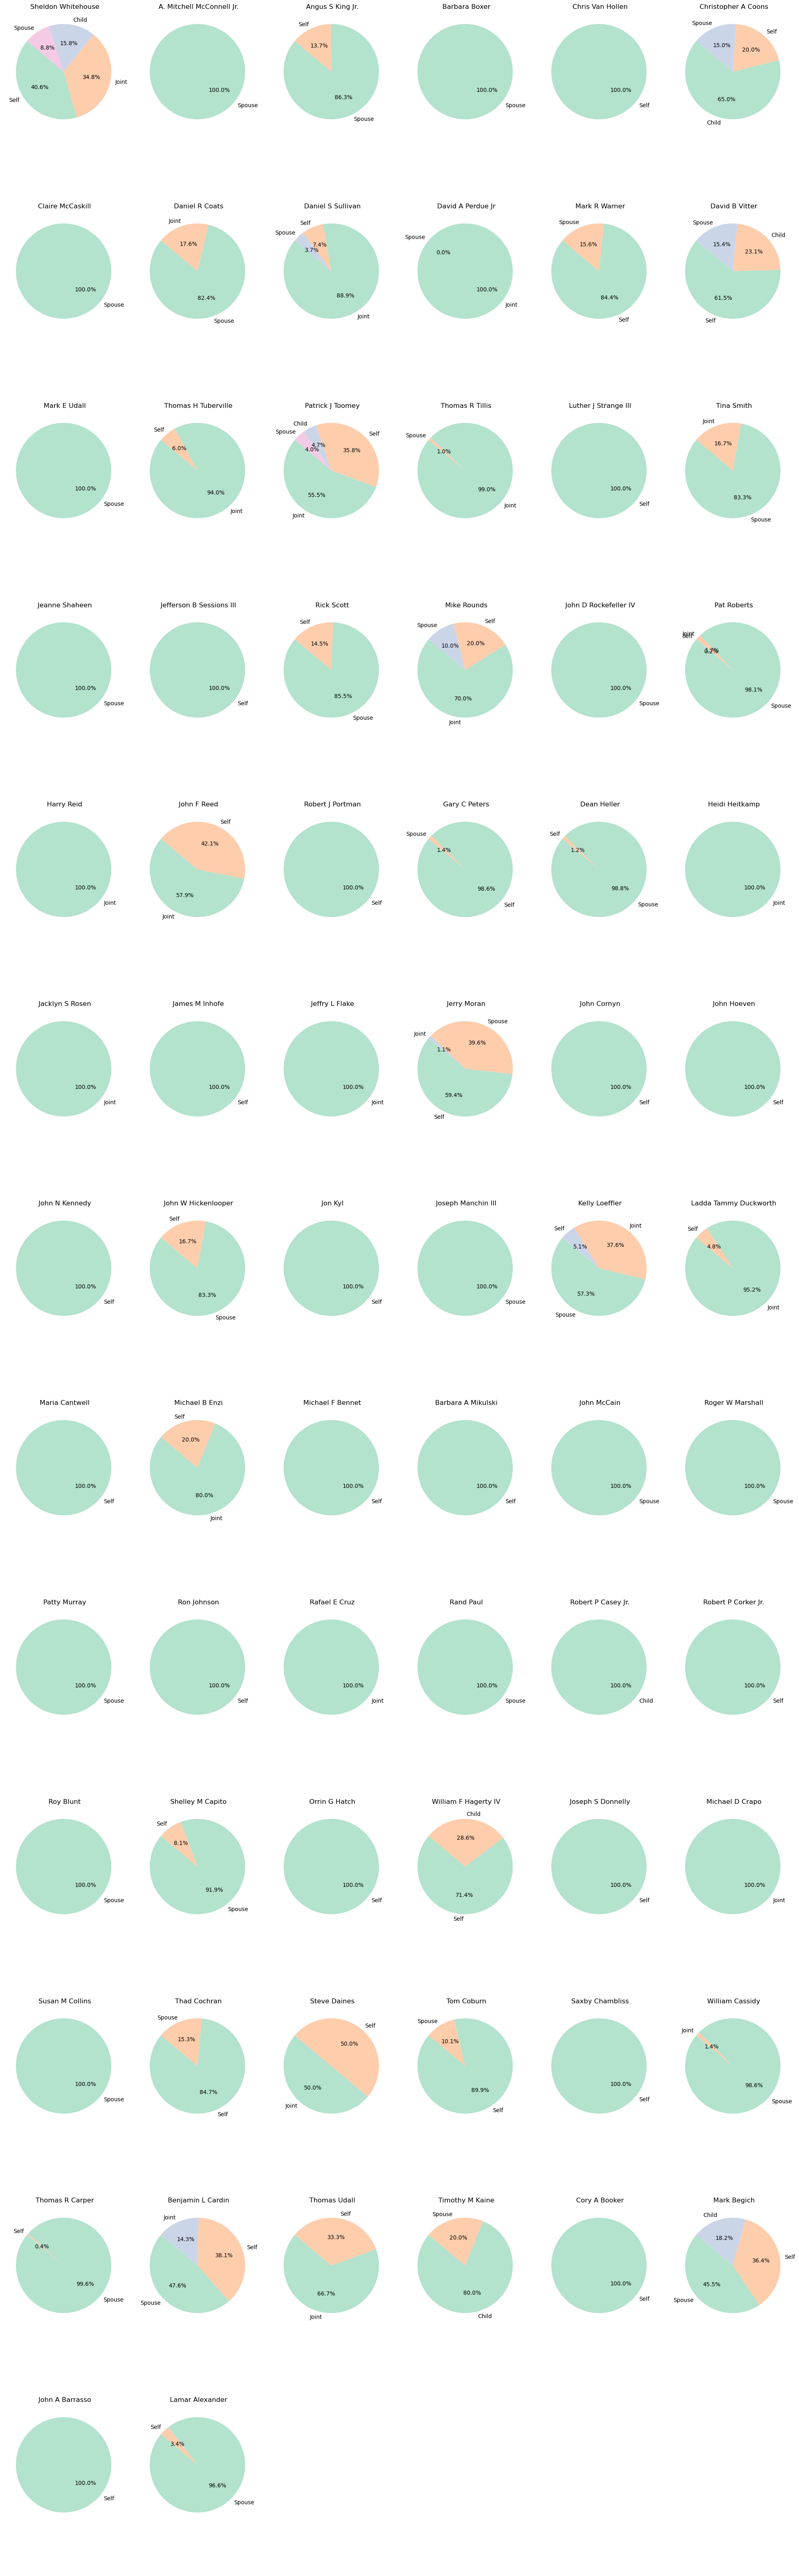

In [5]:
# List of unique senators
senators = df['Name'].unique()
num_cols = 6  # Number of columns in the subplot grid
num_rows = (len(senators) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a pie chart for each senator
for i, senator in enumerate(senators):
    # Filter the data for the current senator
    senator_data = df[df['Name'] == senator]
    
    # Count the occurrences of each 'Owner' type
    owner_counts = senator_data['Owner'].value_counts()
    
    # Calculate percentages
    owner_percentages = (owner_counts / owner_counts.sum()) * 100
    
    # Create the pie chart in the corresponding subplot
    axes[i].pie(owner_percentages, labels=owner_percentages.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
    axes[i].set_title(f'{senator}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

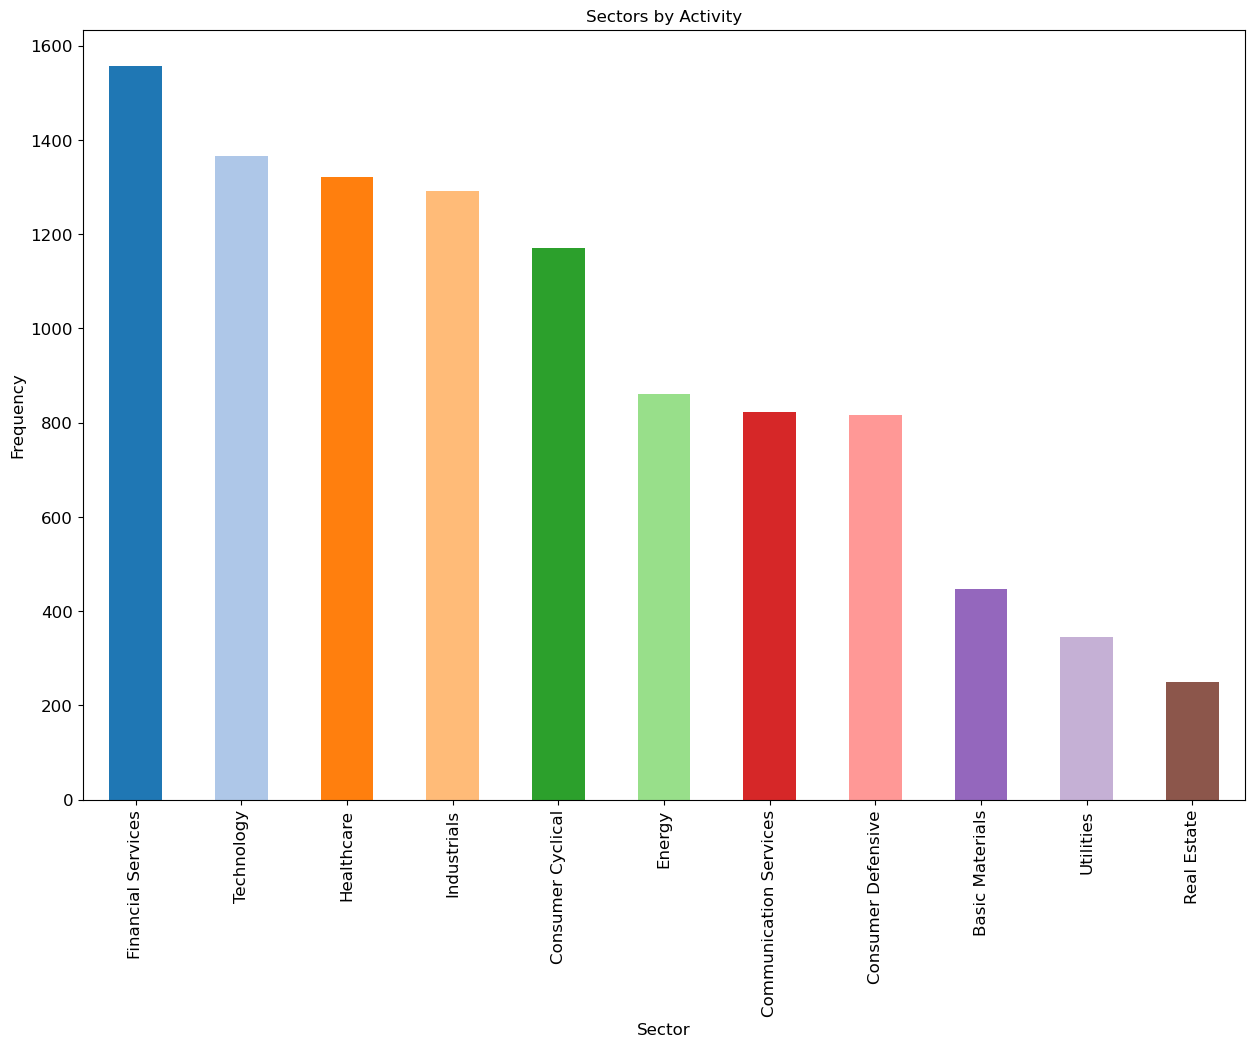

In [6]:
filtered_df = df[df['Sector'] != 'Unknown']

# Get value counts
value_counts = filtered_df['Sector'].value_counts()

# Plot with different colors
ax = value_counts.plot(kind='bar', 
                       title = "Sectors by Activity", 
                       figsize = (15, 10), 
                       legend = False, 
                       fontsize = 12, 
                       color = plt.cm.tab20.colors)  # Use a colormap to get different colors

ax.set_xlabel("Sector", fontsize = 12)
ax.set_ylabel("Frequency", fontsize = 12)
plt.show()

Top 3 months and their counts:
Month
2014-05    1438
2014-01    1364
2014-03     881
Freq: M, Name: count, dtype: int64


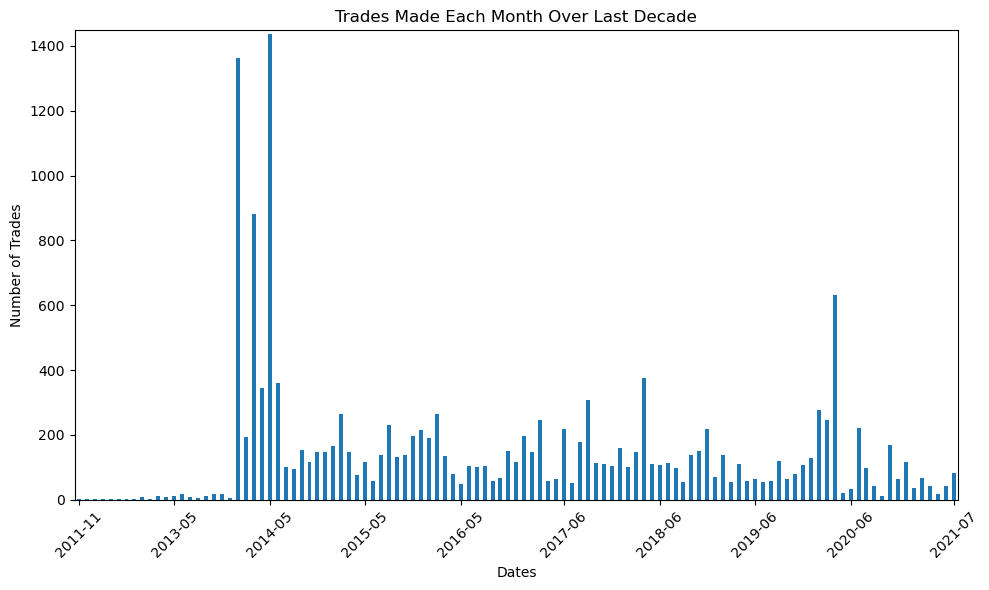

In [7]:
dates_formatted = pd.to_datetime(df['Transaction.Date'], format='%m/%d/%Y')

# Aggregate data by month
df['Month'] = dates_formatted.dt.to_period('M')
monthly_counts = df['Month'].value_counts().sort_index()

top_3_months = monthly_counts.nlargest(3)   # get the 3 highest months and their counts
print("Top 3 months and their counts:")
print(top_3_months)

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')

plt.title('Trades Made Each Month Over Last Decade')
plt.xlabel('Dates')
plt.ylabel('Number of Trades')

# Set the x-ticks to be 10 evenly spaced ticks
num_ticks = 10
ticks = np.linspace(0, len(monthly_counts) - 1, num_ticks, dtype=int)
plt.xticks(ticks, [monthly_counts.index[i].strftime('%Y-%m') for i in ticks], rotation=45)

plt.ylim(0, monthly_counts.max() + 10)  # Adjust y-axis limit for better visibility
plt.tight_layout()
plt.show()